## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/data_Study_results.csv"

# Read the mouse data and...
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [77]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
merged_df['Mouse ID'].count()

1893

In [5]:
# Checking the number of unique mice in the DataFrame.
merged_df['Mouse ID'].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_miceID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_miceID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_df.drop_duplicates(["Mouse ID", "Timepoint"], keep="last")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].count()

1888

In [10]:
# Checking the number of unique mice in the DataFrame.
clean_data['Mouse ID'].nunique()

249

## Summary Statistics

In [81]:
# Identify all Regimens in data to calculate statistics for each and group
regimen_group = clean_data.groupby('Drug Regimen') ['Tumor Volume (mm3)']
regimen_group.size

<bound method GroupBy.size of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000000000AF82C40>>

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume  
    # for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

summary_mean = regimen_group.mean()
summary_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [83]:
summary_median = regimen_group.median()
summary_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [84]:
summary_variance = regimen_group.var()
summary_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [85]:
summary_stdeviation = regimen_group.std()
summary_stdeviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [86]:
summary_sem = regimen_group.sem()
summary_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.526358
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary_table = pd.DataFrame({"Mean": summary_mean, "Median": summary_median, "Variance": summary_variance,
                             "Standard Deviation": summary_stdeviation, "SEM": summary_sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [91]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#Create groups by ID
mice_group = clean_data.groupby(['Timepoint','Drug Regimen'])['Mouse ID']
# mice_group = clean_data.groupby(['Timepoint','Drug Regimen'])

# Count number of mice in each regimen at specific timepoint
mice_count = mice_group.count().unstack()
mice_count

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,24,25
5,25,21,25,23,23,24,24,25,23,24
10,25,20,21,22,21,24,22,24,21,22
15,24,19,21,19,21,20,16,24,21,21
20,23,18,20,19,20,19,16,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


In [92]:
mice_count.dtypes

Drug Regimen
Capomulin    int64
Ceftamin     int64
Infubinol    int64
Ketapril     int64
Naftisol     int64
Placebo      int64
Propriva     int64
Ramicane     int64
Stelasyn     int64
Zoniferol    int64
dtype: object

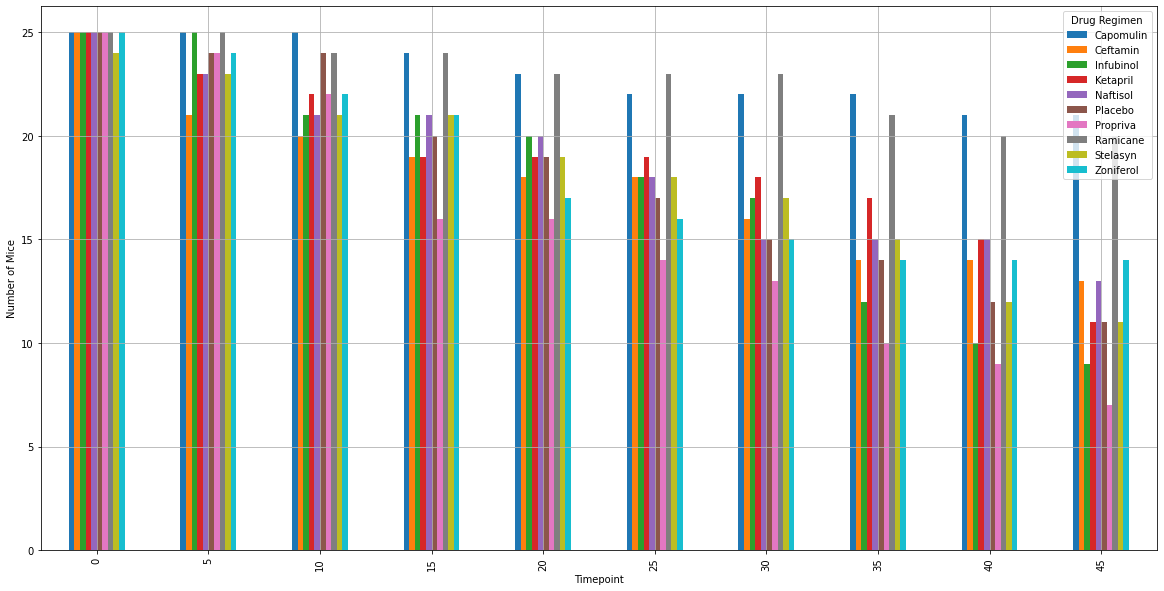

In [93]:
count_chart = mice_count.plot(kind='bar', use_index=True, grid=True, figsize=(20,10))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Timepoint")
count_chart.set_ylabel("Number of Mice")

plt.show()


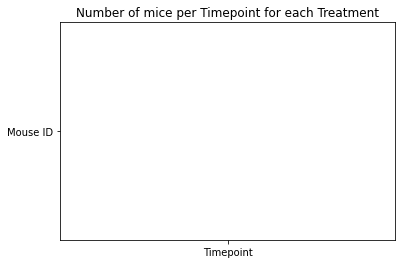

In [94]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

plt.bar("Timepoint", "Mouse ID", data = mice_count)
# Set the xlabel and ylabel using class methods
# plt.xlabel("Timepoint")
# plt.ylabel("Number of Mice")

plt.title("Number of mice per Timepoint for each Treatment")
# plt.legend(loc="upper left")

# plt.tight_layout()
plt.show()

## Pie Plots

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = clean_data['Sex'].value_counts()
gender_distribution

Male      958
Female    930
Name: Sex, dtype: int64

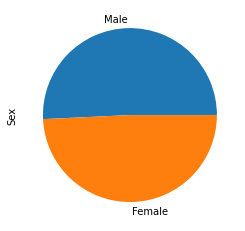

In [56]:
clean_data['Sex'].value_counts().plot(kind='pie');

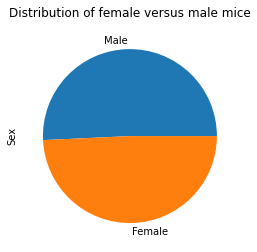

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# clean_data.set(font_scale=1.4)
clean_data['Sex'].value_counts().plot(kind='pie')
plt.title("Distribution of female versus male mice", y=1.02);

## Quartiles, Outliers and Boxplots

In [178]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_tumor_volume = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_tumor_volume

cap_group = capomulin_tumor_volume.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
cap_group

infubinol_tumor_volume = clean_data[clean_data["Drug Regimen"] == "Infubinol"]
infubinol_tumor_volume

inf_group = infubinol_tumor_volume.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
inf_group

ramicane_tumor_volume = clean_data[clean_data["Drug Regimen"] == "Ramicane"]
ramicane_tumor_volume

ram_group = ramicane_tumor_volume.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
ram_group

ceftamin_tumor_volume = clean_data[clean_data["Drug Regimen"] == "Ceftamin"]
ceftamin_tumor_volume

cef_group = ceftamin_tumor_volume.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
cef_group



Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

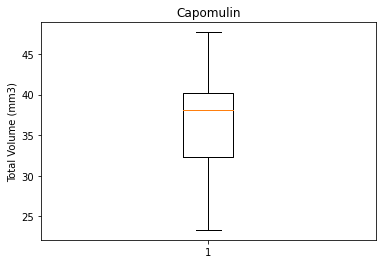

In [179]:
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Total Volume (mm3)')
ax1.boxplot(cap_group)
plt.show()

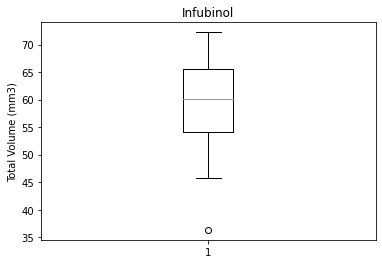

In [180]:
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Total Volume (mm3)')
ax1.boxplot(inf_group)
plt.show()

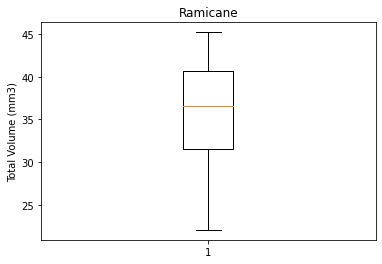

In [181]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Total Volume (mm3)')
ax1.boxplot(ram_group)
plt.show()

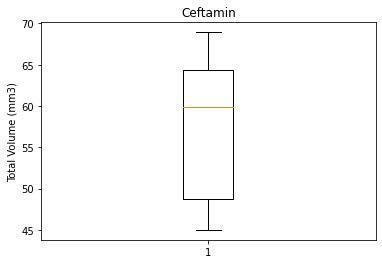

In [182]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Total Volume (mm3)')
ax1.boxplot(cef_group)
plt.show()

In [196]:
data = np.concatenate((cef_group, ram_group, inf_group, cap_group))

{'whiskers': [<matplotlib.lines.Line2D at 0xab85460>,
 'caps': [<matplotlib.lines.Line2D at 0xab85b20>,
 'boxes': [<matplotlib.lines.Line2D at 0xab85100>],
 'medians': [<matplotlib.lines.Line2D at 0xab64220>],
 'fliers': [<matplotlib.lines.Line2D at 0xab64520>],
 'means': []}

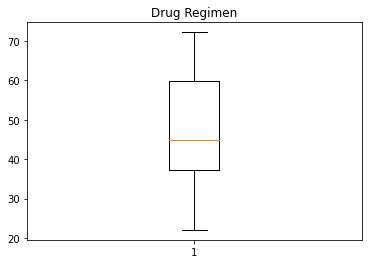

In [197]:
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.boxplot(data)

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [232]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean_data[('Mouse ID')].value_counts()
cap_mouse = clean_data.groupby(['Timepoint','Drug Regimen'])['Mouse ID']
cap_mouse.count()
# cap_group = capomulin_tumor_volume.groupby("Timepoint")["Tumor Volume (mm3)"]
# cap_group                                   


Timepoint  Drug Regimen
0          Capomulin       25
           Ceftamin        25
           Infubinol       25
           Ketapril        25
           Naftisol        25
                           ..
45         Placebo         11
           Propriva         7
           Ramicane        20
           Stelasyn        11
           Zoniferol       14
Name: Mouse ID, Length: 100, dtype: int64

In [233]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_tumor_volume = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_tumor_volume

cap_group_weight = capomulin_tumor_volume.groupby("Mouse ID")["Weight (g)"]
cap_group_weight.head()



10      17
11      17
12      17
13      17
14      17
        ..
435     24
1452    25
1453    25
1454    25
1455    25
Name: Weight (g), Length: 122, dtype: int64

In [234]:
cap_group_volume = capomulin_tumor_volume.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cap_group_volume

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
